<h1>Leaf Disease Classification - Keras CNN .. With 96% Accuracy</h1>
<img 
style="width : 100%;margin: auto;"    
src="https://www.google.com/search?q=leaf+disease&sxsrf=ALiCzsb-Fr5LvT82eoxXJt3fDQmP8Qo_cA:1654161628719&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiGpZ-iuI74AhVKBaYKHYEJBIMQ_AUoAXoECAIQAw&biw=1707&bih=806&dpr=1.13#imgrc=BJHS-ZYd7zmuTM&imgdii=O8NuCBPDZa8ipM>

In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

<h1>Data Loading</h1>
<p>Setting up Image Data Generators<p>

In [4]:
#train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/train",image_size=(256, 256))
#test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/valid",image_size=(256, 256))

train_gen = image_dataset_from_directory(directory="/kaggle/input/powdery-and-rust/Plant Data/Train/Train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/kaggle/input/powdery-and-rust/Plant Data/Test/Test",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 1359 files belonging to 3 classes.
Found 170 files belonging to 3 classes.


<h1>Data Engineering</h1>
<p>Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators</p>

<h1>Modelling</h1>

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       7

In [4]:
ep = 32
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/32
43/43 [==============================] - 221s 5s/step - loss: 1.4087 - accuracy: 0.3473 - val_loss: 1.1192 - val_accuracy: 0.2941
Epoch 2/32
43/43 [==============================] - 219s 5s/step - loss: 1.1276 - accuracy: 0.3760 - val_loss: 1.1285 - val_accuracy: 0.3059
Epoch 3/32
43/43 [==============================] - 216s 5s/step - loss: 0.9699 - accuracy: 0.5143 - val_loss: 0.8265 - val_accuracy: 0.5765
Epoch 4/32
43/43 [==============================] - 216s 5s/step - loss: 0.6924 - accuracy: 0.6659 - val_loss: 0.6258 - val_accuracy: 0.7000
Epoch 5/32
43/43 [==============================] - 216s 5s/step - loss: 0.5296 - accuracy: 0.7756 - val_loss: 0.5657 - val_accuracy: 0.7588
Epoch 6/32
43/43 [==============================] - 216s 5s/step - loss: 0.3592 - accuracy: 0.8602 - val_loss: 0.5686 - val_accuracy: 0.8059
Epoch 7/32
43/43 [==============================] - 216s 5s/step - loss: 0.2314 - accuracy: 0.9139 - val_loss: 0.3467 - val_accuracy: 0.8529
Epoch 8/32
43

In [5]:
model.save('/kaggle/working/model.h5')

In [6]:
model.save_weights('/kaggle/working/weights.h5')

<h1>Metrics</h1>

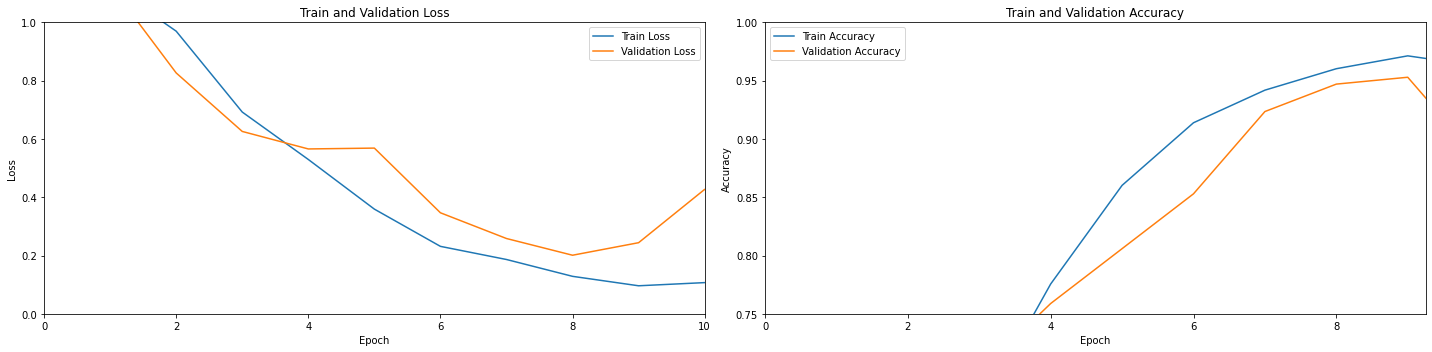

In [7]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)                                                                                                           
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [8]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [9]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [10]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.26 %
Test Accuracy   : 96.47 %
Precision Score : 96.47 %
Recall Score    : 96.47 %


<h3>Confusion Matrix</h3>

<Figure size 1440x360 with 0 Axes>

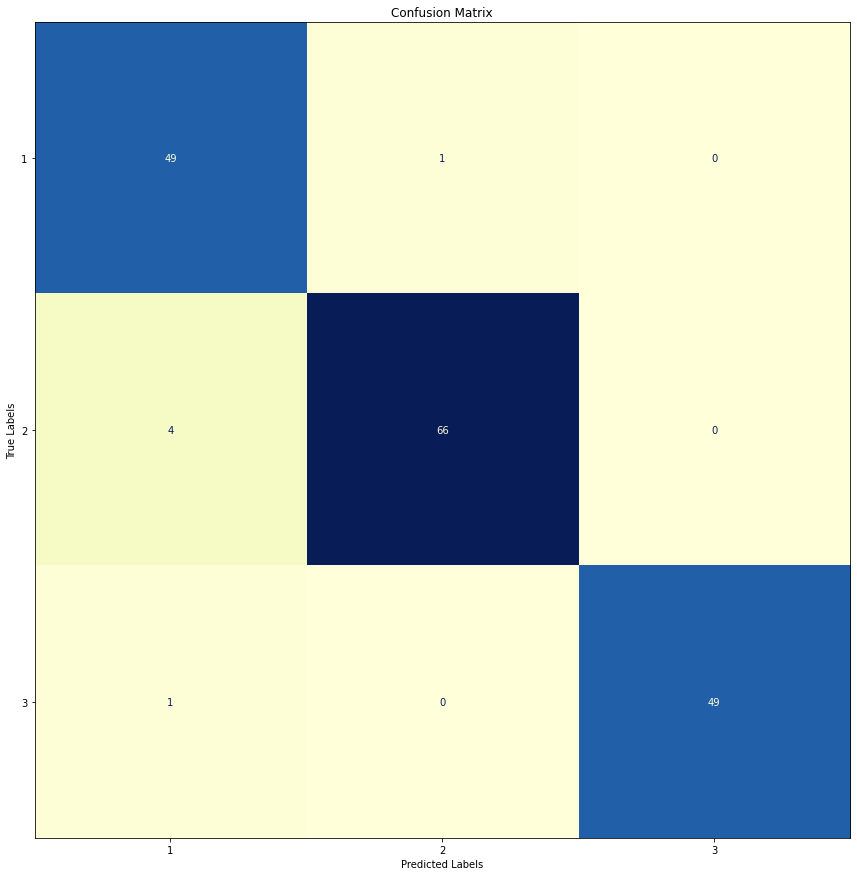

In [11]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,4)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

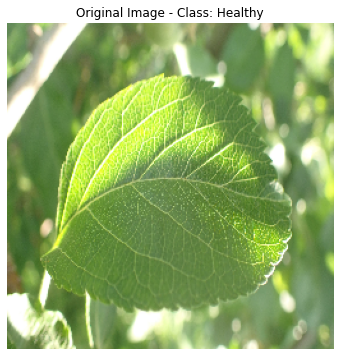

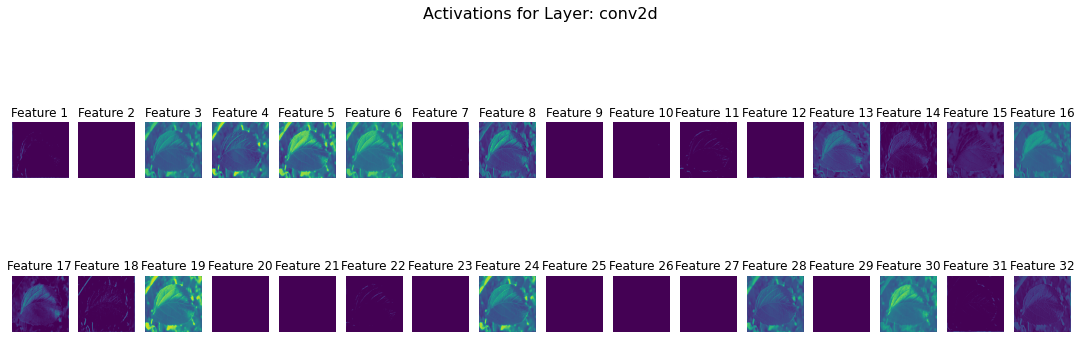

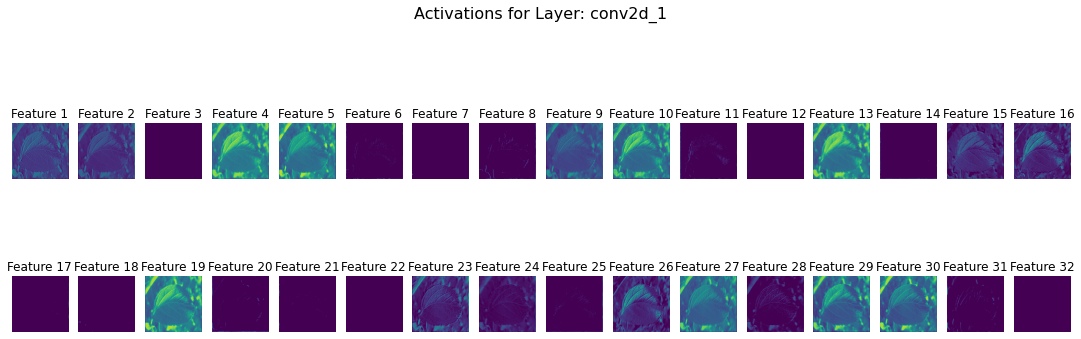

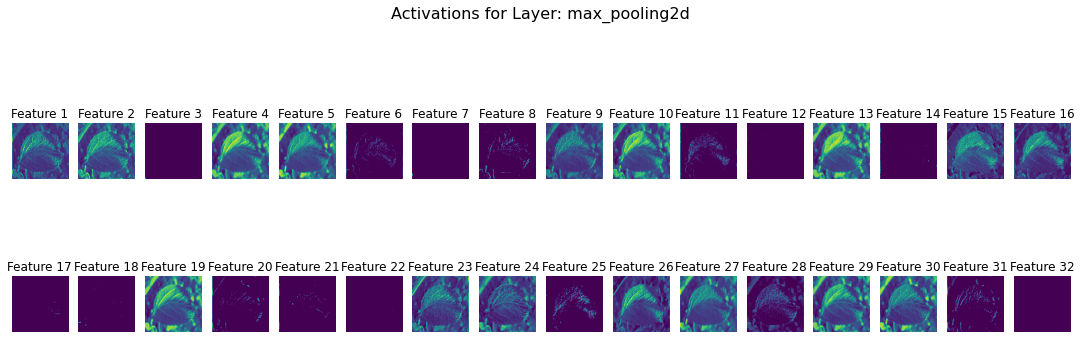

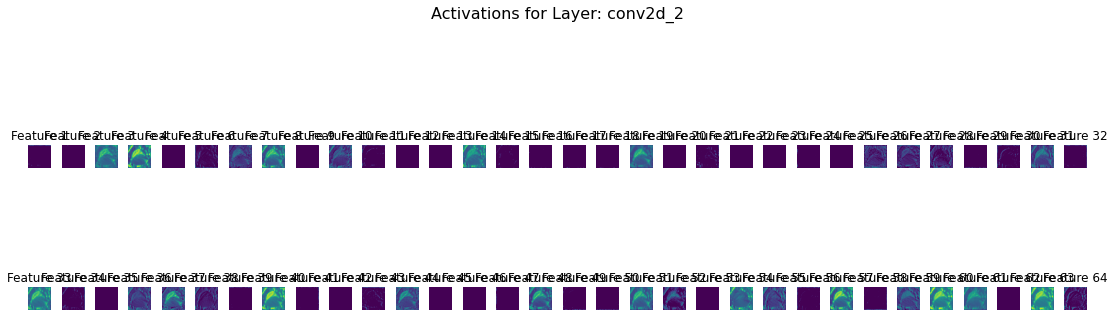

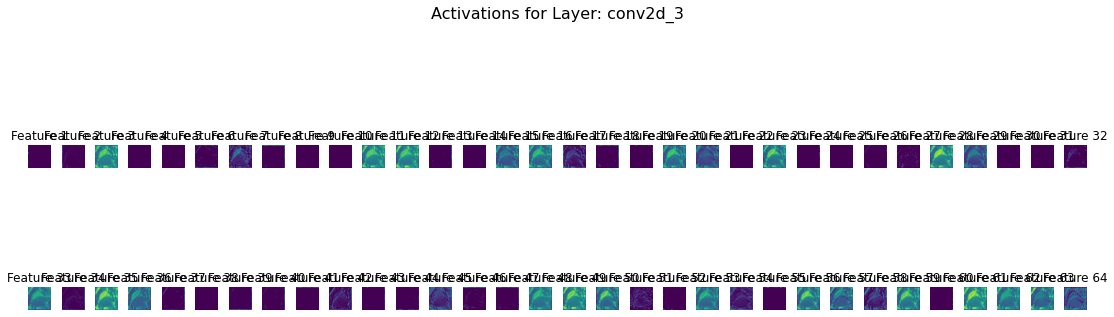

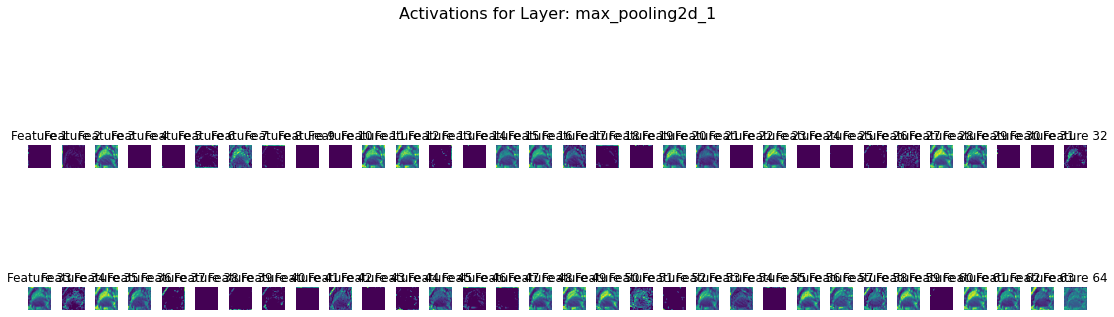

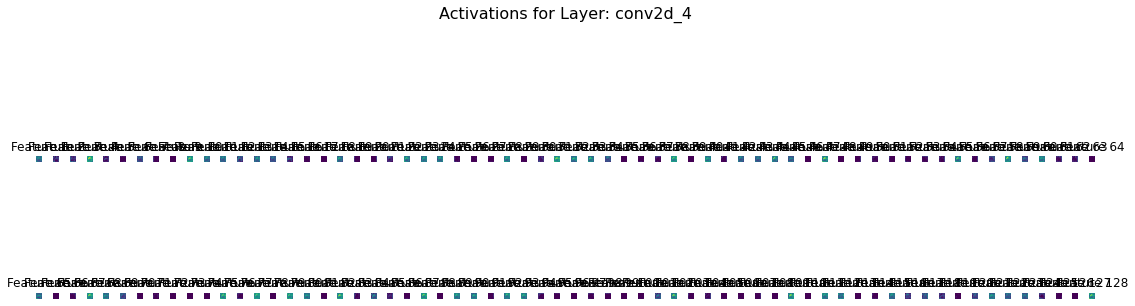

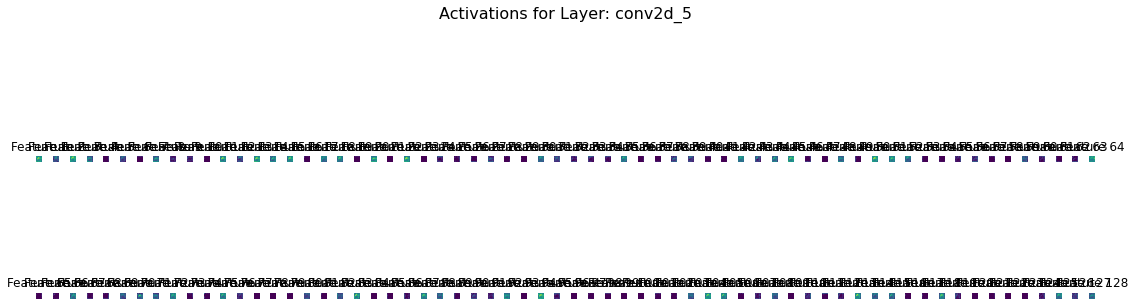

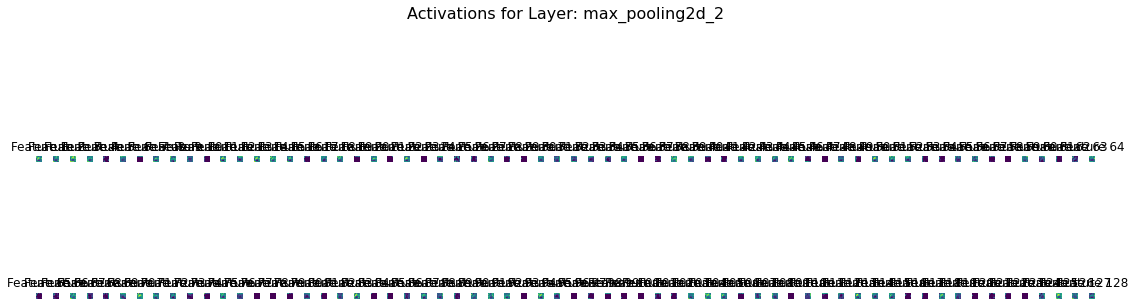

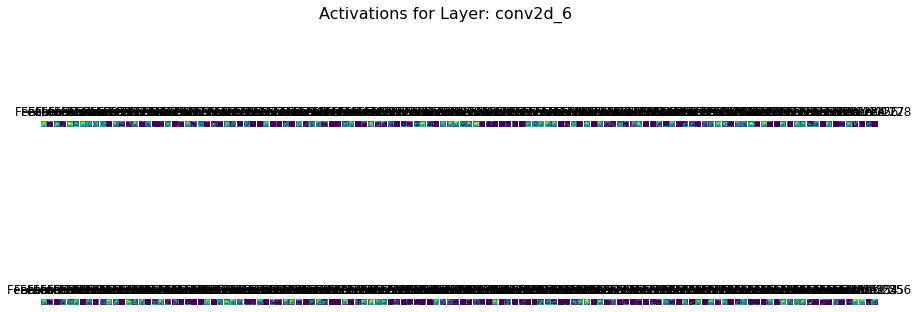

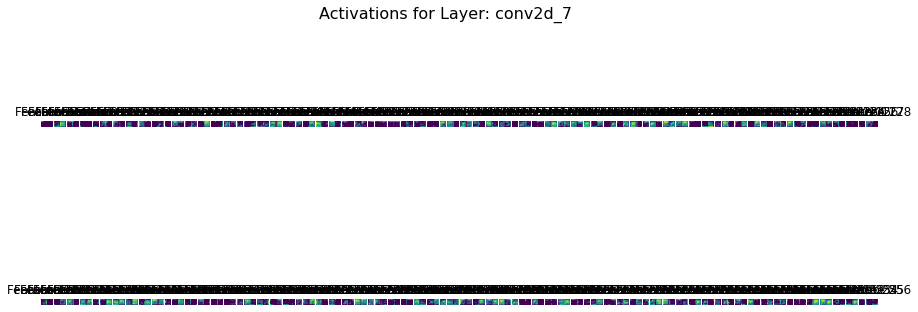

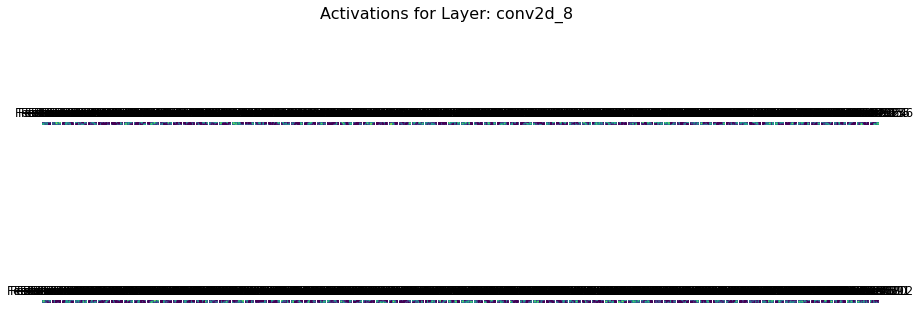

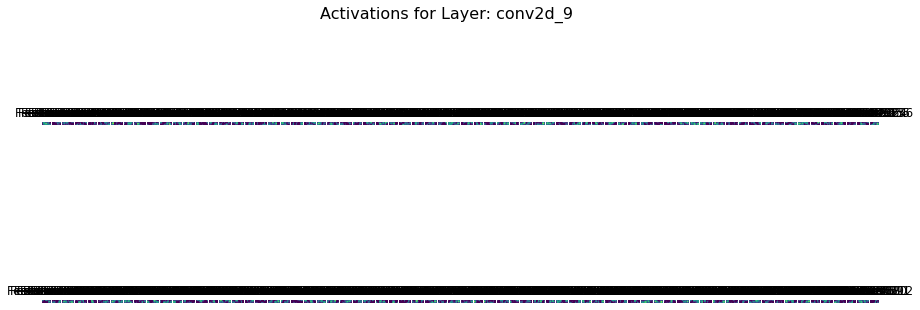

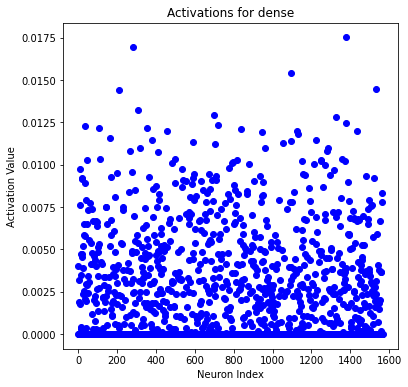

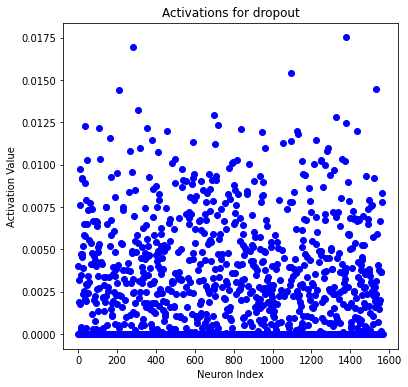

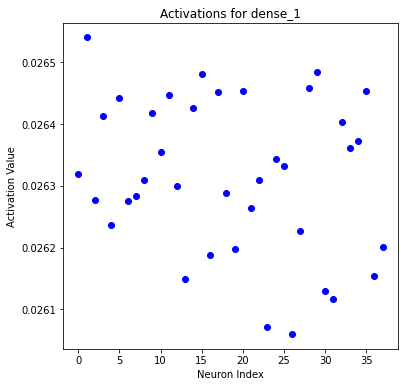

In [13]:
# Define the class names
class_names = ['Healthy', 'Powdery Mildew', 'Rust']

# Choose one image from the training dataset
for images, labels in train_gen.take(1):
    sample_image = images[0]  # Take the first image
    sample_label = labels[0]  # Corresponding label

# Create an intermediate model to visualize activations
activation_model = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

# Get activations for the sample image
activations = activation_model.predict(sample_image[np.newaxis, ...])

# Visualize original image
plt.figure(figsize=(6, 6))
plt.imshow(sample_image.numpy())
plt.title(f'Original Image - Class: {class_names[sample_label]}')
plt.axis('off')
plt.show()

# Visualize activations for each layer
layer_names = [layer.name for layer in model.layers]

for layer_name, activation in zip(layer_names, activations):
    if len(activation.shape) == 4:  # Check if activation is 4-dimensional (convolutional layer)
        num_features = activation.shape[-1]
        
        plt.figure(figsize=(15, 6))
        plt.suptitle(f'Activations for Layer: {layer_name}', fontsize=16)
        
        for j in range(num_features):
            plt.subplot(2, num_features//2, j + 1)
            plt.title(f'Feature {j + 1}')
            plt.imshow(activation[0, :, :, j], cmap='viridis')
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    elif 'flatten' in layer_name:  # Flatten layer
        plt.figure(figsize=(6, 6))
        plt.imshow(activation, cmap='viridis')
        plt.title(f'Activations for Flatten Layer: {layer_name}')
        plt.axis('off')
        plt.show()
    elif 'dense' in layer_name or 'dropout' in layer_name:  # Dense and Dropout layers
        plt.figure(figsize=(6, 6))
        plt.plot(activation[0], 'bo')
        plt.title(f'Activations for {layer_name}')
        plt.xlabel('Neuron Index')
        plt.ylabel('Activation Value')
        plt.show()
